In [79]:
import math as m
import matplotlib.pyplot as plt

1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [59]:
def hex_letters(n): # or, with dictionaries and get(*args)
    assert type(n) == int
    if n == 10: n = 'A'
    elif n == 11: n = 'B'
    elif n == 12: n = 'C'
    elif n == 13: n = 'D'
    elif n == 16: n = 'E'
    elif n == 15: n = 'F'
    else: n = str(n)
    return n

def hex_digits(l):
    if l == 'A': l = 10
    elif l == 'B': l = 11
    elif l == 'C': l = 12
    elif l == 'D': l = 13
    elif l == 'E': l = 14
    elif l == 'F': l = 15
    else: l = int(l)
    return l

In [60]:
#print(hex_letters(0))
#print(hex_digits(9))

In [61]:
def approx(n,m):
    if m>=5:
        n+=1
    else:
        n=n
    return n

In [63]:
def converter(x, inrepr, outrepr):
   # assert (type(x) == int or type(x) == float) and (x>=0), "x must be non-negative int or float" # all possible options except complex numbers
    floor_x_str = ''
    fractional_x_str = ''
        
    if inrepr == "dec" and outrepr == "bin": 
        floor_x = int(x // 1)
        fractional_x = x - x // 1
        while floor_x > 0:
            remainder = floor_x%2
            floor_x = floor_x//2
            floor_x_str += str(remainder)
        floor_x_str = floor_x_str[::-1]
        for i in range(5): # fixed number of fractionary digits
            fractional_x *= 2
            remainder = int(fractional_x // 1)
            fractional_x = fractional_x - fractional_x // 1 
            fractional_x_str += str(remainder)
        result = float(floor_x_str + '.' + fractional_x_str)
        
    elif inrepr == "dec" and outrepr == "hex":
        floor_x = int(x // 1)
        fractional_x = x - x // 1
        if floor_x == 0: floor_x_str = '0'
        else:
            while floor_x > 0:
                remainder = hex_letters(floor_x%16)
                floor_x = floor_x//16
                floor_x_str += remainder
            floor_x_str = floor_x_str[::-1]
        for i in range(5): # fixed number of significant digits
            fractional_x *= 16
            remainder = hex_letters(int(fractional_x // 1))
            fractional_x = fractional_x - fractional_x // 1 
            fractional_x_str += remainder
        result = floor_x_str + '.' + fractional_x_str
        
    elif inrepr == "bin" and outrepr == "dec": # best style of implementation, to use also in the other cases
        split_x = str(x).split('.')
        #print(split_x)
        floor_x = [d for d in split_x[0]]
        #print("floor_x:", floor_x)
        if len(split_x) > 1:
            fractional_x = [d for d in split_x[1]]
        else:
            fractional_x = [] # ---> to handle integer case
        floor_result = 0
        for i,digit in enumerate(floor_x[::-1]):
            floor_result += int(digit) * 2**i
            #print("partial floor result:", floor_result)
        #print("floor result:", floor_result)
        fractional_numerator = 0
        n = len(fractional_x)
        #print("n of fractional part:", n)
        fractional_denominator = 2**n # ---> NB to do only one division at the end
        for i in range(n):
            digit = fractional_x[i]
            #assert (digit == '1' or digit == '0'), "Input must be binary float or int"
            fractional_numerator += int(digit) * 2**(n-i-1)
        fractional_result = fractional_numerator / fractional_denominator
            #print("power of two:", -i-1, '\n', "partial fractional result:", fractional_result)
        #print("fractional result:", fractional_result)
        result = floor_result + fractional_result

    elif inrepr == "hex" and outrepr == "dec":
        split_x = str(x).split('.')
        floor_x = [d for d in split_x[0]]
        fractional_x = [d for d in split_x[1]] + [0,0,0,0,0,0]
        floor_result = 0
        for i,digit in enumerate(floor_x[::-1]):
            floor_result += int(hex_digits(digit)) * 16**i
        fractional_result = 0
        for i in range(0,5):
            digit = str(fractional_x[i])
            #assert (digit == '1' or digit == '0'), "Input must be binary float or int"
            fractional_result += hex_digits(digit) * 16**(-i-1)
        result = floor_result + fractional_result
            
    return result

In [64]:
#print(converter(0, 'dec', 'bin'))

In [65]:
converter("1101010.0010101000101010100101010", 'bin', 'dec')

106.1647122502327

2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [66]:
# idea: input as string, split it using slice syntax for lists,
# assign to each int value (for sign value it's +-1);
# then result is product of the three, approximate it to one digit using the "approx" function

def convert_to_float(word):
    word = str(word)
    #print("word:", word)
    sign_word = word[0]
    sign = 1
    if int(sign_word) == 1:
        sign = -1
    #print(sign)
    exponent_word = word[1:9]
    exponent = converter(int(exponent_word), 'bin', 'dec') # ---> number
    #print("exponent word:", exponent_word)
    print("exponent:", exponent)
    mantissa_word = "1." + word[9:]
    mantissa = converter(mantissa_word, 'bin', 'dec')
    print("mantissa:", mantissa)
    result = sign * 2**(exponent-127) * mantissa
    return result

In [67]:
r=convert_to_float(10010110100101101100110011001100)
print(r) # ---> it's correct as far as can be checked

exponent: 45.0
mantissa: 1.1781249046325684
-2.436305200694863e-25


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [68]:
def overflow_check():
    o=1.0 # ---> has to be float
    counter = 1
    while not m.isinf(o): # ---> if simpler, loop would never stop
        o *= 2
        #print(o, '\n')
        counter = counter +1
    print(counter)

def underflow_check():
    u=1
    counter = 1
    while u!=0:
        u /= 2
        counter=counter+1
    print(counter)

In [69]:
underflow_check()

1076


In [70]:
overflow_check() # ---> never stops?

1025


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [71]:
def precision_check():
    x = 10.0
    y=1.0
    counter = 1
    x_final=0
    while x_final != x:
        y /= 2
        x_final = x+y
        counter += 1
    print(counter)

In [72]:
precision_check()

51


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [73]:
# c- see if c also handles well "regular" cases;
# also try cases with very big / small b, c; might help to handle diff cases with diff formulas
import math as m
def quadratic_roots(a,b,c): # ---> only for real valued roots, and non-zero parameter values
    delta_root = m.sqrt(b**2-4*a*c)
    x_p = (-b + delta_root)/(2*a)
    x_m = (-b - delta_root)/(2*a)
    return x_p, x_m

quadratic_roots(0.001, 1000, 0.001) # ---> second root is ok

(-9.999894245993346e-07, -999999.999999)

In [74]:
def alternative_quadratic_roots(a,b,c): 
    delta = b**2-4*a*c
    x_p = (delta-b*b)/(2*a*(b+m.sqrt(delta)))
    x_m = (delta-b*b)/(2*a*(b-m.sqrt(delta)))
    return x_p, x_m

alternative_quadratic_roots(0.001, 1000, 0.001) # ---> first root is ok

# ---> problem: b and sqrt(delta) cancel each other out if opposite sign, and then small denominator ampifies this

(-1.00000761449437e-06, -1000018.1900864029)

In [75]:
def perfect_quadratic_roots(a,b,c):
    delta = b**2-4*a*c
    if b > 0:
        x_p = (delta-b*b)/(2*a*(b+m.sqrt(delta))) # ---> far-from-zero numerator
        x_m = (-b - m.sqrt(delta))/(2*a)  
    else:
        x_p = (-b + m.sqrt(delta))/(2*a)
        x_m = (delta-b*b)/(2*a*(b-m.sqrt(delta))) # ---> almost-zero numerator, but denominator not too small
    return x_p, x_m
    
perfect_quadratic_roots(0.001, 1000, 0.001) 

(-1.00000761449437e-06, -999999.999999)

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

Correct derivative: 1.0 
 Approximate derivative with delta = 1e-08: 1.0000000039225287


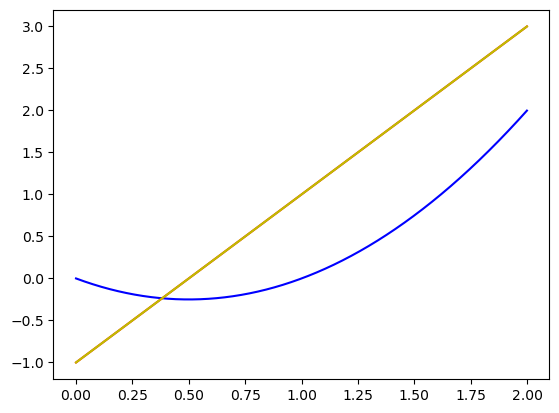

In [92]:
# idea: (straightforward implementation;)
# reason why: dividing by number close to zero accentuates tiny errors in numerator (evm prove it with error propagation)
dp=1e-8
def myfunc(domain): # ---> domain as python list
    values = []
    for x in domain:
        y=x*(x-1)
        values.append(y)
    return values

def correct_derivative(domain):
    values = []
    for x in domain:
        y=2*x-1
        values.append(y)
    return values 
    
mydomain=[x/1000 for x in list(range(2000))]
#print(mydomain[:10])
myfunc_values=myfunc(mydomain)
correct_derivative_values = correct_derivative(mydomain)

def approx_derivative(domain, delta_par):
    values = []
    delta_par_domain= [x + delta_par for x in domain]
    for i in range(len(domain)):
        y = (myfunc(delta_par_domain)[i]-myfunc(domain)[i])/delta_par
        values.append(y)
    return values
approx_derivative_values = approx_derivative(mydomain, delta_par=dp)

print("Correct derivative:", correct_derivative_values[1000], '\n', f"Approximate derivative with delta = {dp}:", approx_derivative_values[1000])
    
plt.plot(mydomain,myfunc_values, color = 'b')
plt.plot(mydomain,correct_derivative_values, color = 'r')
plt.plot(mydomain,approx_derivative_values, color='y')
plt.show

In [110]:
dp_list = [1e-2,1e-4,1e-6,1e-8,1e-10,1e-12,1e-14]
approx_derivative_values_point = [abs(approx_derivative(mydomain, delta_par=dp_fromlist)[1000]-correct_derivative_values[1000])for dp_fromlist in dp_list]

[0.010000000000000897, 9.999999988985486e-05, 9.99917733279787e-07, 3.922528746258536e-09, 8.284037100736441e-08, 8.890058334132256e-05, 0.0007992778373491216]


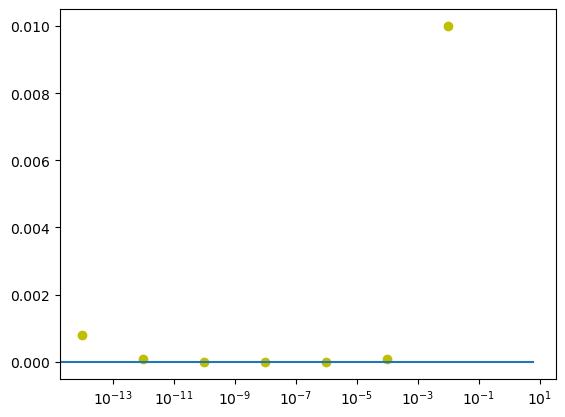

In [111]:
print(approx_derivative_values_point)
correct_values=[0 for x in dp_list]
plt.xscale('log')
plt.scatter(dp_list,approx_derivative_values_point, color='y')
plt.plot(correct_values)

# ---> y looks proportional to log(x)^2

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [163]:
import numpy as np # ---> much more tiresome without numpy
pi_half = 3.14159265358979323846264338327950288419716939937510/2 
def compute_integral(lb, ub, N_par):
    x = np.linspace(lb,ub,N_par)
    h=2/N_par
    I = np.sum(np.sqrt(1-x**2) * h)
    return I

In [164]:
N_par_list=[100,1e4,1e6,1e8]
result_list = []
time_list=[]

start = time.time()
result2=compute_integral(-1,1,100)
end = time.time()
time_list.append(end-start)
result_list.append(result2-pi_half)

In [165]:
start = time.time()
result4 = compute_integral(-1,1,10000)
end = time.time()
time_list.append(end-start)
result_list.append(result4-pi_half)

In [166]:
start = time.time()
result6 = compute_integral(-1,1,1000000)
end = time.time()
time_list.append(end-start)
result_list.append(result6-pi_half)

In [167]:
start = time.time()
result8 = compute_integral(-1,1,100000000)
end = time.time()
time_list.append(end-start)
result_list.append(result8-pi_half)
# ---> for higher values, we get memory error

<function matplotlib.pyplot.show(close=None, block=None)>

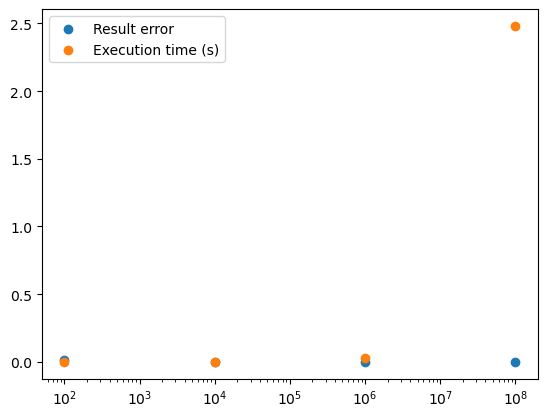

In [169]:
# ---> could make this fancier by using diff scales for each
plt.xscale('log')
result_list = [abs(x) for x in result_list]
#pi_half_list = [pi_half for value in N_par_list]
plt.scatter(N_par_list,result_list, label="Result error")
plt.scatter(N_par_list,time_list, label= "Execution time (s)")
plt.legend()
plt.show